In [5]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt



# Question 1

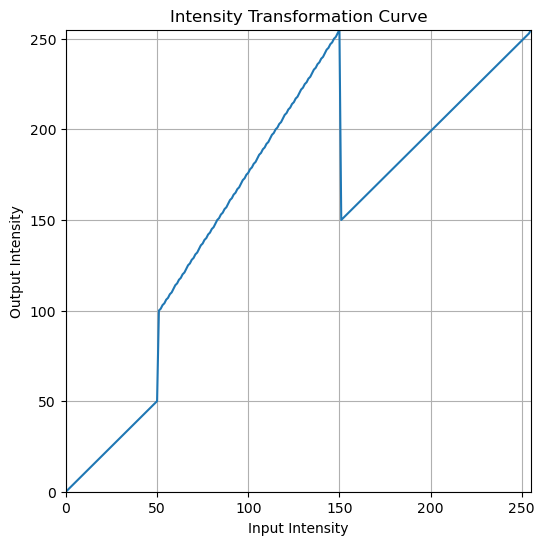

In [6]:
# Load the image in grayscale
image = cv.imread('a1images/emma.jpg', cv.IMREAD_GRAYSCALE)
assert image is not None, "Image not found - check the path"

# Define the piecewise linear transformation
# Segment 1: 0-50 → 0-50 (linear)
t1 = np.linspace(0, 50, num=51).astype('uint8')

# Segment 2: 51-150 → 100-255 (linear)
t2 = np.linspace(100, 255, num=100).astype('uint8')

# Segment 3: 151-255 → 150-255 (linear)
t3 = np.linspace(150, 255, num=105).astype('uint8')

# Combine all segments to create the full transformation LUT
transformation = np.concatenate((t1, t2, t3), axis=0).astype('uint8')


# Plot the transformation curve
plt.figure(figsize=(6, 6))
plt.plot(transformation)
plt.title('Intensity Transformation Curve')
plt.xlabel('Input Intensity')
plt.ylabel('Output Intensity')
plt.xlim(0, 255)
plt.ylim(0, 255)
plt.grid(True)
plt.show()

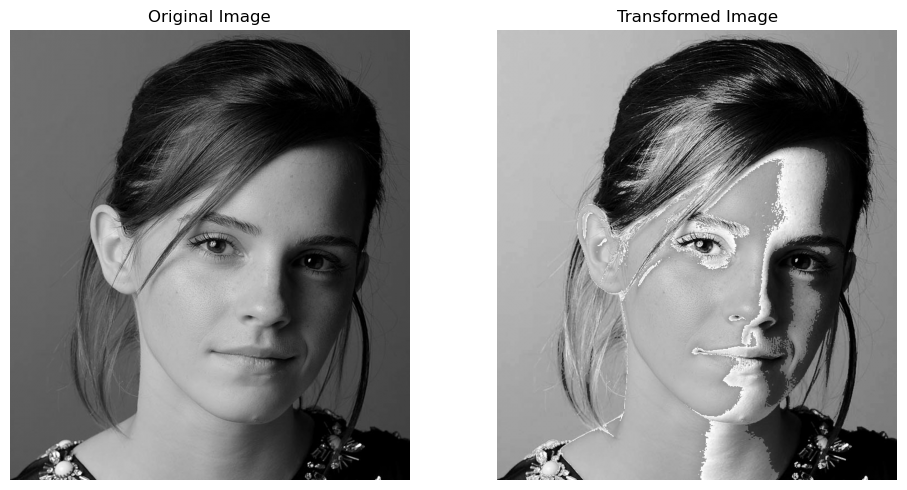

In [7]:


# Apply the transformation to the image
transformed_image = transformation[image]

# Display original and transformed images side by side
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(image, cmap='gray', vmin=0, vmax=255)
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(transformed_image, cmap='gray', vmin=0, vmax=255)
axes[1].set_title('Transformed Image')
axes[1].axis('off')

plt.tight_layout()
plt.show()


# Question 2

In [9]:


# Load brain image
brain = cv.imread('a1images/brain_proton_density_slice.png', cv.IMREAD_GRAYSCALE)
assert brain is not None, "Brain image not found"

def apply_gaussian_transform(image, mu, sigma, plot_title=""):
    """Apply Gaussian transformation and plot results"""
    # Create Gaussian pulse transformation
    x = np.linspace(0, 255, 256)
    t = 255 * np.exp(-((x - mu)**2) / (2 * sigma**2))
    t = np.clip(t, 0, 255).astype('uint8')
    
    # Plot transformation curve
    plt.figure(figsize=(5, 5))
    plt.plot(t)
    plt.title(plot_title)
    plt.xlabel("Input Intensity")
    plt.ylabel("Output Intensity")
    plt.xlim(0, 255)
    plt.ylim(0, 255)
    plt.grid(True)
    plt.show()
    
    # Apply transformation
    transformed = t[image]
    
    # Display result
    plt.figure(figsize=(5, 5))
    plt.imshow(transformed, cmap='gray', vmin=0, vmax=255)
    plt.axis('off')
    plt.show()
    
    return transformed



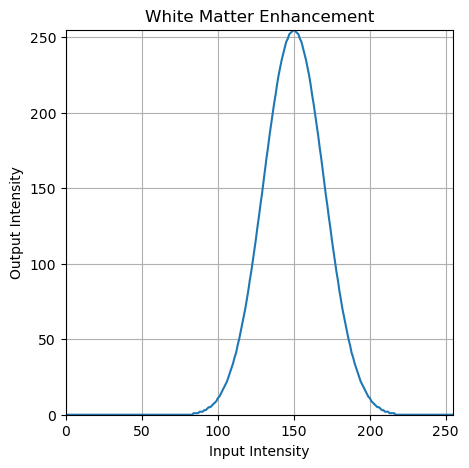

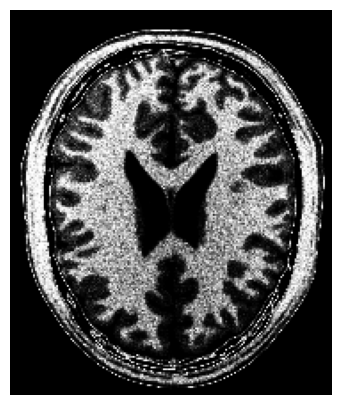

In [12]:
# Part (a) Accentuate white matter (brighter regions)
white_matter = apply_gaussian_transform(brain, mu=150, sigma=20, 
                                      plot_title="White Matter Enhancement")


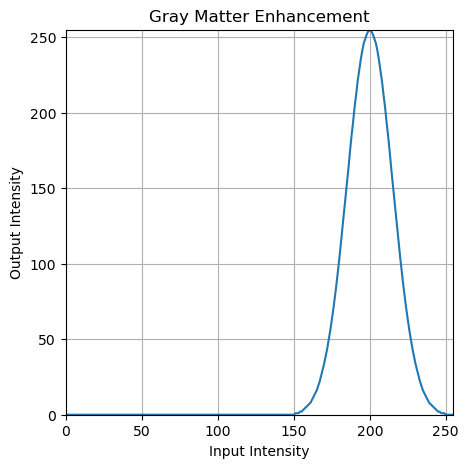

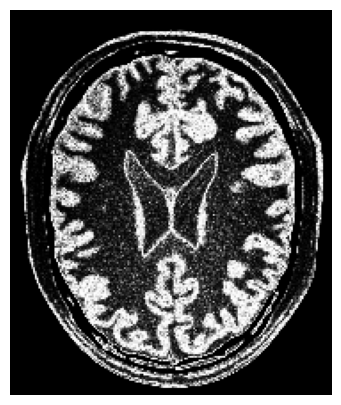

In [11]:

# Part (b) Accentuate gray matter (darker regions)
gray_matter = apply_gaussian_transform(brain, mu=200, sigma=15,
                                     plot_title="Gray Matter Enhancement")